# Introduction

Energy saving is one of the most important issues today. The efficient use of resources is very important in terms of not only providing us an economic profit, but also leaving a good world for future generations.
This dataset provides insights into energy efficiency meter evaluated projects for residential existing homes in New York state from 2007-2012
With this study, i wanted to see if there is any correlation between total project cost and energy bill savings, the cost of the energy efficiency project  from region to region, and what is the effect of the size of the house on the cost. This dataset contains all the information needed to answer these issues. In this notebook we will test to get some of the answers I have answered.


# Data Source
https://www.kaggle.com/datasets/thedevastator/residential-home-energy-efficiency

# Mounting Google Drive

Accessing the data from the above dataset.

In [126]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Pandas

Getting the specific tools I need to run statistcal analysis on the dataframe.

In [145]:
#import packages as needed.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_style('white')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

# Connection with Excel Datasheet

Looking at the the data type and how many rows and nulls.

In [128]:
df = pd.read_csv ('/content/gdrive/MyDrive/energy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         3652 non-null   int64  
 1   Project ID                                    3652 non-null   object 
 2   Contractor ID                                 3652 non-null   object 
 3   Project County                                3652 non-null   object 
 4   Project City                                  3652 non-null   object 
 5   Project ZIP                                   3652 non-null   int64  
 6   Climate Zone                                  3652 non-null   object 
 7   Weather Station                               3652 non-null   int64  
 8   Weather Station-Normalization                 3652 non-null   int64  
 9   Project Completion Date                       3652 non-null   o

# Cleaning DataFrame

Checking for Nulls and cleaning dataframe.

In [191]:
df.isnull().sum()

Total Project Cost ($)    0
Customer Type             0
dtype: int64

# Organizing DataFrame
I had 2 sets of similar columns, I changed the name of the columns and used it for a different purpose.I searched 2007 and 2012 electricity prices in NYC from the internet. I determined the average kWh as 23 cents. I had this calculated in the Electric saving column I just created.In a separate column, I calculated how many years they would receive the investment of the project. It rounded the electric saving column to 2 decimals and the investment return column to one decimal.


In [162]:
#renamed the columns
df.rename(columns={"annually_electric_saving": "Electric Saving($)", "Estimated Annual Gas Savings (MMBtu)": "Gas Saving($)"}, inplace=True)
df["Electric Saving($)"]=0.23*df['Evaluated Annual Electric Savings (kWh)']
#creating new columns and investment return calculation.
df['Investment Return(yr)']= df['Total Project Cost ($)'] / df['Electric Saving($)']
#rounding
df = df.round({'Investment Return(yr)':0,'Electric Saving($)':2})

I filter the investment return because some values are negative.


In [164]:
df = df.loc[df['Electric Saving($)'] > 0 ]
df.head()

,index,Project ID,Contractor ID,Project County,Project City,Project ZIP,Climate Zone,Weather Station,Weather Station-Normalization,Project Completion Date,Customer Type,Size of Home,Volume of Home,Number of Units,Year Home Built,Total Project Cost ($),Contractor Incentive ($),Total Incentives ($),Amount Financed Through Program ($),Estimated Annual Electric Savings (kWh),Gas Saving($),Estimated First Year Energy Bill Savings ($),Baseline Electric (kWh),Baseline Gas (MMBtu),Reporting Electric (kWh),Reporting Gas (MMBtu),Evaluated Annual Electric Savings (kWh),Evaluated Annual Gas Savings (MMBtu),Central Hudson,Consolidated Edison,LIPA,National Grid,National Fuel Gas,NYSEG,Orange and Rockland,Rochester Gas and Electric,Location 1,Electric Saving($),Investment Return(yr)
0,0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5|A|Cold,725190,725190,08/17/2007,Market,2422.0,17602.0,NaN,1977.0,10000.0,500.00,1000.0,0.0,NaN,NaN,580.52,11535.60,0.00,10484.28,0.00,1051.32,0.00,False,False,False,True,False,False,False,False,"Fabius, NY 13063\n(42.850323, -75.979919)",241.80,41.0
1,1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5|A|Cold,725190,725190,10/04/2007,Assisted,826.0,5873.0,1.0,1890.0,20000.0,500.00,5000.0,15000.0,NaN,NaN,2329.59,24581.05,0.00,15336.66,0.00,9244.40,0.00,False,False,False,True,False,False,False,False,"Nedrow, NY 13120\n(42.950373, -76.163321)",2126.21,9.0
7,7,P00000423004,CY0000000036,Saratoga,Gansevoort,12831,5|A|Cold,725180,725180,07/20/2007,Market,1240.0,11240.0,1.0,1975.0,3181.0,234.05,318.1,0.0,NaN,NaN,312.03,9857.35,0.00,6175.31,0.00,3682.03,0.00,False,False,False,True,False,False,False,False,"Gansevoort, NY 12831\n(43.188019, -73.693309)",846.87,4.0
9,9,P00000467105,CY0000000107,Albany,Albany,12211,5|A|Cold,725180,725180,06/16/2007,Market,2494.0,19952.0,NaN,1986.0,4620.0,231.00,462.0,0.0,NaN,NaN,2259.57,15464.86,91.65,11995.49,97.36,3469.37,-5.72,False,False,False,True,False,False,False,False,"Albany, NY 12211\n(42.708691, -73.767259)",797.96,6.0
10,10,P00000640079,CY0000000675,Rensselaer,Wynantskill,12198,5|A|Cold,725180,725180,11/16/2007,Market,4038.0,37897.0,1.0,1840.0,7880.0,394.00,788.0,0.0,NaN,NaN,2942.53,8648.40,216.08,6763.84,228.16,1884.55,-12.08,False,False,False,True,False,False,False,False,"Wynantskill, NY 12198\n(42.680971, -73.634804)",433.45,18.0


# Exploring the Dataset
Descriptive analysis for a few columns

In [165]:
df[["Total Project Cost ($)","Estimated First Year Energy Bill Savings ($)","Electric Saving($)", "Size of Home","Volume of Home", "Investment Return(yr)"]].describe()

,Total Project Cost ($),Estimated First Year Energy Bill Savings ($),Electric Saving($),Size of Home,Volume of Home,Investment Return(yr)
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,8261.800688,721.886769,345.392810,1994.575434,15966.460614,164.222964
std,4807.462653,629.515890,587.288122,913.780862,7541.782479,1013.501717
min,500.000000,1.190000,0.350000,520.000000,4160.000000,0.000000
25%,4675.500000,269.582500,89.057500,1381.000000,10929.000000,16.000000
50%,7198.500000,589.055000,204.250000,1815.500000,14540.000000,37.000000
75%,10520.750000,982.707500,413.550000,2395.000000,18879.000000,85.000000
max,40000.000000,4986.030000,10839.660000,10260.000000,82080.000000,23268.000000


# Visualization of correlation using sns:

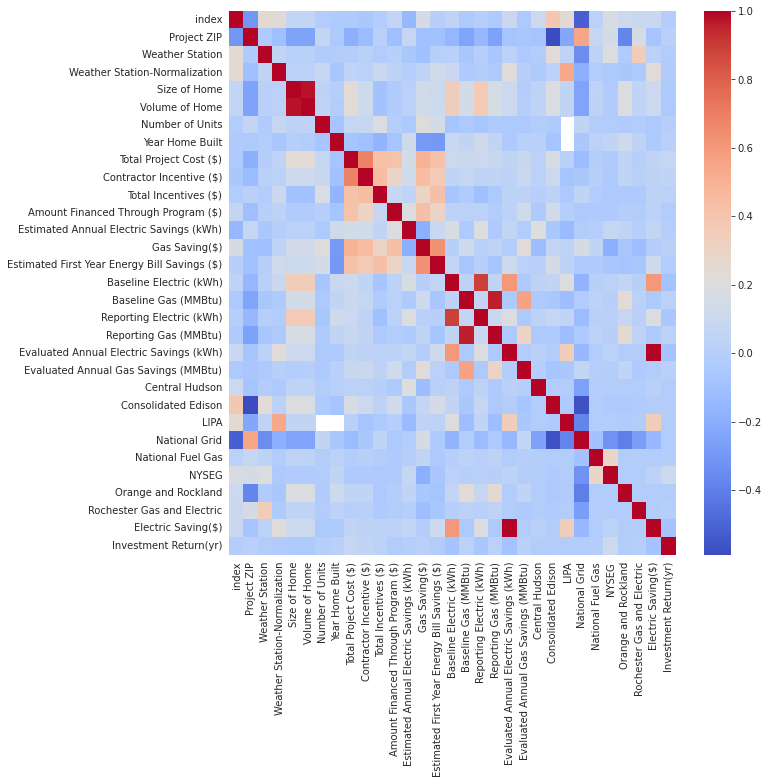

In [166]:
#plotting sns figure for correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm')

# Correlation Matrix:

In [168]:
df.corr()

,index,Project ZIP,Weather Station,Weather Station-Normalization,Size of Home,Volume of Home,Number of Units,Year Home Built,Total Project Cost ($),Contractor Incentive ($),Total Incentives ($),Amount Financed Through Program ($),Estimated Annual Electric Savings (kWh),Gas Saving($),Estimated First Year Energy Bill Savings ($),Baseline Electric (kWh),Baseline Gas (MMBtu),Reporting Electric (kWh),Reporting Gas (MMBtu),Evaluated Annual Electric Savings (kWh),Evaluated Annual Gas Savings (MMBtu),Central Hudson,Consolidated Edison,LIPA,National Grid,National Fuel Gas,NYSEG,Orange and Rockland,Rochester Gas and Electric,Electric Saving($),Investment Return(yr)
index,1.000000,-0.306300,0.249094,0.242633,0.062498,0.056951,-0.018498,-0.032942,-0.036248,-0.053525,-0.020962,0.064369,-0.143755,0.158668,0.001715,0.040358,-0.044620,-0.000054,-0.036188,0.088375,-0.044425,0.103938,0.385116,0.245213,-0.517026,0.019926,0.177831,0.100873,0.098502,0.088375,-0.011685
Project ZIP,-0.306300,1.000000,-0.031184,-0.103884,-0.250303,-0.251055,0.066381,-0.042209,-0.189024,-0.125615,0.018813,-0.105283,0.074117,-0.095924,-0.093548,-0.152952,-0.242589,-0.144234,-0.257456,-0.079655,-0.065648,-0.079676,-0.589229,-0.230878,0.555802,0.073862,0.147173,-0.376123,0.161493,-0.079655,0.017434
Weather Station,0.249094,-0.031184,1.000000,0.050540,0.008114,0.011613,-0.026247,-0.012588,-0.011535,0.008709,-0.018647,0.005605,-0.052092,-0.102289,0.001940,0.008816,-0.065023,-0.000408,-0.059877,0.020005,-0.044052,-0.019658,0.232223,0.042250,-0.346463,0.036778,0.197079,-0.024453,0.357367,0.020004,-0.011902
Weather Station-Normalization,0.242633,-0.103884,0.050540,1.000000,0.021183,0.020082,0.075056,-0.064124,0.042591,0.023518,0.098303,0.033289,0.000422,0.042382,0.129030,0.092601,-0.032936,-0.012580,-0.038306,0.224794,0.000807,-0.031940,0.021421,0.546016,-0.191017,-0.021397,-0.040725,-0.053323,-0.031855,0.224794,-0.025950
Size of Home,0.062498,-0.250303,0.008114,0.021183,1.000000,0.979923,0.036930,-0.004021,0.238544,0.115985,-0.091101,-0.026070,0.020695,0.131147,0.107840,0.346414,0.140214,0.369905,0.165848,0.103991,-0.011435,0.038118,0.188473,0.049572,-0.246778,0.038023,-0.028813,0.191535,0.050171,0.103991,-0.035384
Volume of Home,0.056951,-0.251055,0.011613,0.020082,0.979923,1.000000,0.039703,-0.016576,0.239013,0.118261,-0.090010,-0.027773,0.022154,0.136190,0.112992,0.344059,0.147110,0.367261,0.171720,0.103513,-0.005376,0.041698,0.184096,0.051036,-0.244089,0.032128,-0.029037,0.188868,0.049184,0.103512,-0.037746
Number of Units,-0.018498,0.066381,-0.026247,0.075056,0.036930,0.039703,1.000000,-0.071879,0.074014,0.082706,0.184606,-0.005087,-0.041262,0.213122,0.148851,-0.070104,-0.045840,-0.066173,-0.036233,-0.037672,-0.047242,-0.016081,-0.032197,NaN,0.054303,-0.012030,-0.022507,-0.024983,-0.018005,-0.037672,-0.005080
Year Home Built,-0.032942,-0.042209,-0.012588,-0.064124,-0.004021,-0.016576,-0.071879,1.000000,-0.075357,-0.098040,-0.162279,-0.076779,0.122358,-0.289907,-0.294712,0.093107,0.050394,0.120670,0.054414,-0.039400,0.010831,0.010804,-0.077357,NaN,-0.054690,0.025278,0.052876,0.115710,0.037272,-0.039400,0.015119
Total Project Cost ($),-0.036248,-0.189024,-0.011535,0.042591,0.238544,0.239013,0.074014,-0.075357,1.000000,0.686585,0.420563,0.415215,0.137473,0.493689,0.418129,0.104758,0.099016,0.100600,0.086288,0.051352,0.081245,0.025250,0.169654,0.009753,-0.123936,-0.008921,-0.035210,0.044618,0.002646,0.051352,0.072780
Contractor Incentive ($),-0.053525,-0.125615,0.008709,0.023518,0.115985,0.118261,0.082706,-0.098040,0.686585,1.000000,0.444057,0.303442,0.128950,0.453187,0.370469,0.048331,0.073115,0.039346,0.050488,0.036180,0.098321,0.023175,0.104916,-0.074998,-0.052579,0.000868,-0.032920,0.046194,0.011315,0.036180,0.044184


# Pairplot
The pairplot lets us compare total project cost and other variables on a scatterplot to see the correlation.

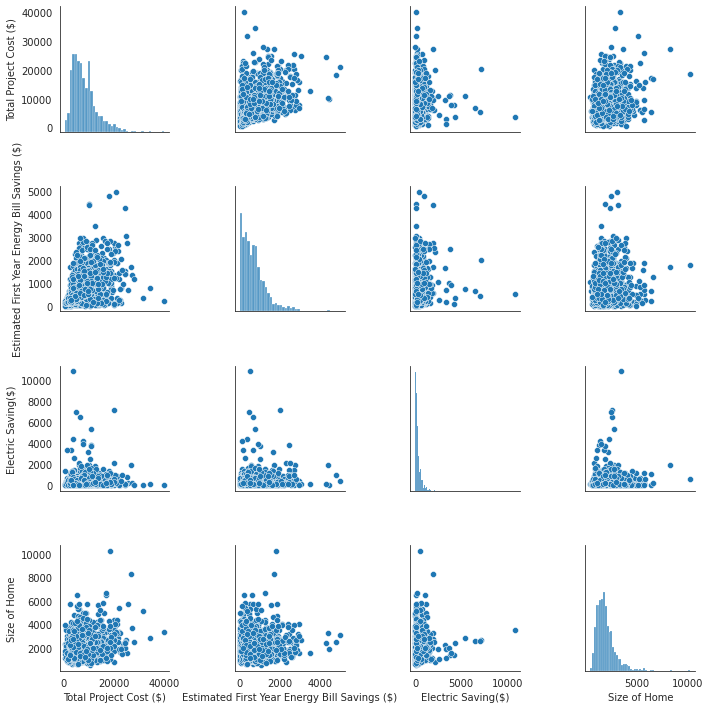

In [154]:
sns.pairplot(df, vars = ['Total Project Cost ($)', 'Estimated First Year Energy Bill Savings ($)', 'Electric Saving($)','Size of Home'])

# QUESTION 1: Correlation between Total project cost and Estimated first year energy bill savings
Is there a correlation between total project cost and estimates first year energy bill savings.?

Yes. There is a moderate correlation between total project cost and estimates first year energy bill savings. 

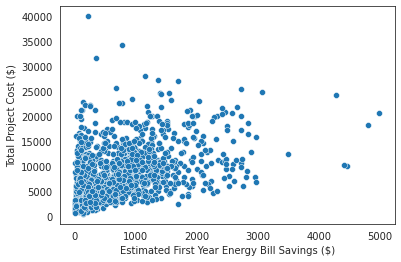

In [158]:
sns.scatterplot(x = "Estimated First Year Energy Bill Savings ($)", y = "Total Project Cost ($)", data = df)

The pearson r test allows us to see if there is a signficant linear relationship. If the correlation is between 0.3 to 0.5 there is a moderate linear relationship.

In [170]:
stats.pearsonr(df['Estimated First Year Energy Bill Savings ($)'],df['Total Project Cost ($)'])

(0.4181290103469127, 1.8428229737226183e-64)

Reject the null. There is a statistically significant linear relationship between Total Project Cost and Estimated first year energy bill savings.

# QUESTION 2: If location or size of the house affecting the project cost?
Does the location affect the project cost? 
Creating a bar chart to see the effect of the region on the project price. So I can compare the project cost according to the region.As you can see in the chart below, Tompkins county has the highest numbers.


Text(0.5, 1.0, 'Total Project Cost by location')

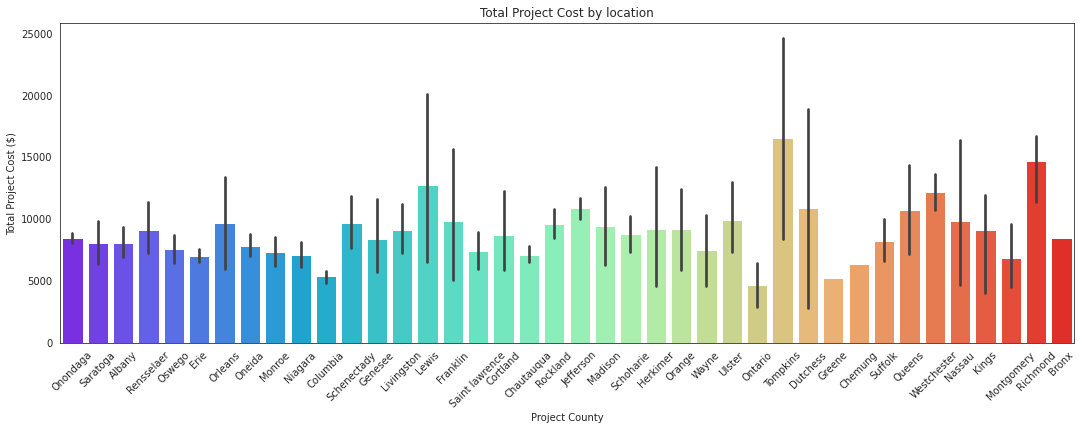

In [153]:
#creating bar chart for location comparison
plt.figure(figsize=(40,20))
plt.subplot(3,2,1)
ax=sns.barplot(df['Project County'], df['Total Project Cost ($)'], palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title("Total Project Cost by location")

Is there a correlation between total project cost and size of the house?



Yes.There is a correlation between total project cost and size of house.

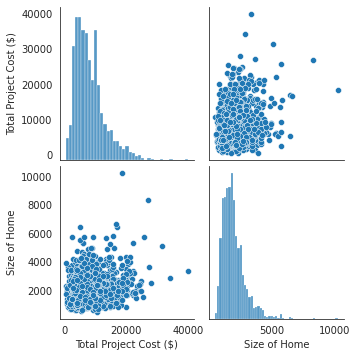

In [171]:
sns.pairplot(df, vars = ['Total Project Cost ($)', 'Size of Home'])

In [172]:
stats.pearsonr(df['Size of Home'],df['Total Project Cost ($)'])

(0.23854413433450813, 7.947106446556325e-21)

Reject the null. There is a minor statistically significant linear relationship between Total Project Cost and size of house.

# OTHER
Visualization of comparison is breaked into several for good visualization:



Text(0.5, 1.0, 'Total Project Cost vs climate zone')

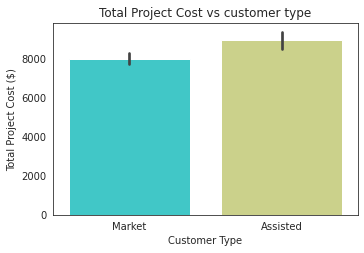

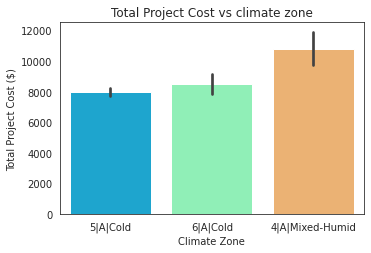

In [186]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.barplot(df['Customer Type'], df['Total Project Cost ($)'], palette='rainbow')
plt.title("Total Project Cost vs customer type")

plt.figure(figsize=(12,12))
plt.subplot(3,2,2)
sns.barplot(df['Climate Zone'], df['Total Project Cost ($)'], palette='rainbow')
plt.title("Total Project Cost vs climate zone")


# Recommendations

After review, here are some recommendations based on the analysis. I found this energy efficient project successful. My obvervation is that the electric saving increases as the investment is made in the project.For the future residential customer, I can say that the investment they will make will most likely pay off for them. However, in how many years the investments will return, may be the subject of future research.
Apart from that, I found that the size of the house is effective on the project cost, and the investment costs differ according to the location. Also, I observed that Market customers are less than assisted customers and that the mixed-Humied climate zone is the most costly.